In [1]:
import requests
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# cd documents/nss/projects/Python_Projects/music_matters/Notebooks

Things to look into:
 - top venues
 - top cover song by venue
 - percentage of cover to total per city (pie chart)
 - percentage of cover to total per venue 
 - top 10 covered songs overall
 - top 10 covered artists overall

In [2]:
data={'Cities':['New York', 'Nashville', 'Austin', 'Los Angeles', 'Chicago', 
           'Las Vegas', 'Denver', 'San Fransicso', 'Seattle', 'Portland'], 
 'States': ['NY', 'TN', 'TX', 'CA', 'IL', 'NV', 'CO', 'CA', 'WA', 'OR'], 
      'Number of Setlists':[8155, 2225, 4369, 8021, 5683, 4327, 3063, 2565, 3186, 2362]}


df=pd.DataFrame(data)

df['Number of Requests']=df['Number of Setlists']/20
df

,Cities,States,Number of Setlists,Number of Requests
0,New York,NY,8155,407.75
1,Nashville,TN,2225,111.25
2,Austin,TX,4369,218.45
3,Los Angeles,CA,8021,401.05
4,Chicago,IL,5683,284.15
5,Las Vegas,NV,4327,216.35
6,Denver,CO,3063,153.15
7,San Fransicso,CA,2565,128.25
8,Seattle,WA,3186,159.30
9,Portland,OR,2362,118.10


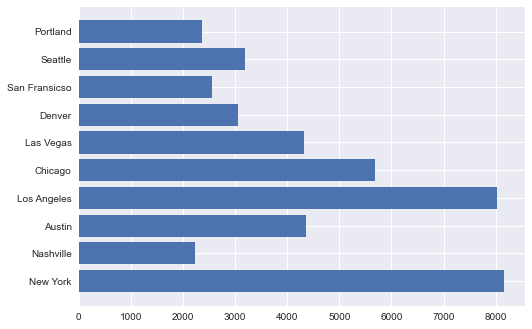

In [3]:
# US cities
plt.barh(df['Cities'],df['Number of Setlists'])
plt.show()

In [4]:
non_us_cities = {'Cities': ['London', 'Paris', 'Toronto', 'Buenos Aires', 'Manchester', 'Brussels', 'Berlin', 'Barcelona', 'Amsterdam', 'Antwerp','Glasgow'], 
        'Country_Code': ['GB', 'FR', 'CA', 'AR', 'GB', 'BE', 'DE','ES', 'NL', 'BE', 'GB'], 
        'Number of Setlists':[8409,3791,3788,3480,3059,2634,2504,2417,2235,2215,2018]      
       }

non_us_cities_df=pd.DataFrame(non_us_cities)

non_us_cities_df['Number of Requests']=non_us_cities_df['Number of Setlists']/20
non_us_cities_df

,Cities,Country_Code,Number of Setlists,Number of Requests
0,London,GB,8409,420.45
1,Paris,FR,3791,189.55
2,Toronto,CA,3788,189.40
3,Buenos Aires,AR,3480,174.00
4,Manchester,GB,3059,152.95
5,Brussels,BE,2634,131.70
6,Berlin,DE,2504,125.20
7,Barcelona,ES,2417,120.85
8,Amsterdam,NL,2235,111.75
9,Antwerp,BE,2215,110.75


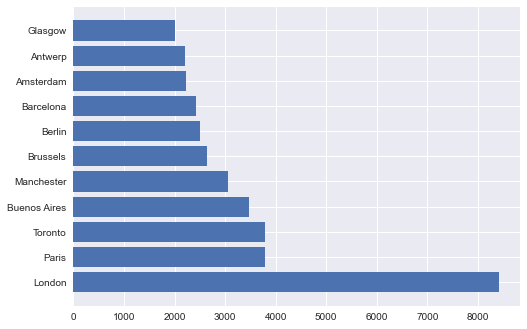

In [5]:
plt.barh(non_us_cities_df['Cities'],non_us_cities_df['Number of Setlists'])
plt.show()

In [6]:
portland=pd.read_excel('../Data/music_matters_portland.xlsx')
portland['city'].value_counts()

Portland        11641
Troutdale         665
Happy Valley      296
Forest Grove      131
Beaverton          37
West Linn          16
Name: city, dtype: int64

Realized that by Portland, they also included concerts from the surrounding area. Decided to only focus on concerts in the proper city area. 

In [7]:
portland = portland[portland['city']=='Portland']
portland['city'].value_counts()

Portland    11641
Name: city, dtype: int64

In [8]:
seattle=pd.read_excel('../Data/music_matters_seattle.xlsx')
seattle = seattle[seattle['city']=='Seattle']

In [9]:
nashville=pd.read_excel('../Data/music_matters_nashville.xlsx')
nashville = nashville[nashville['city']=='Nashville']

In [10]:
new_york=pd.read_excel('../Data/music_matters_new_york.xlsx')
new_york = new_york[new_york['city']=='New York']

In [11]:
los_angeles =pd.read_excel('../Data/music_matters_los_angeles.xlsx')
los_angeles = los_angeles[los_angeles['city']=='Los Angeles']

In [12]:
austin =pd.read_excel('../Data/music_matters_austin.xlsx')
austin = austin[austin['city']=='Austin']

In [13]:
chicago =pd.read_excel('../Data/music_matters_chicago.xlsx')
chicago = chicago[chicago['city']=='Chicago']

In [14]:
denver =pd.read_excel('../Data/music_matters_denver.xlsx')
denver = denver[denver['city']=='Denver']

In [15]:
las_vegas =pd.read_excel('../Data/music_matters_las_vegas.xlsx')
las_vegas = las_vegas[las_vegas['city']=='Las Vegas']

In [16]:
san_francisco =pd.read_excel('../Data/music_matters_san_francisco.xlsx')
san_francisco = san_francisco[san_francisco['city']=='San Francisco']

## Non US Cities

In [17]:
paris =pd.read_excel('../Data/music_matters_paris.xlsx')
paris = paris[paris['city']=='Paris']

In [18]:
toronto =pd.read_excel('../Data/music_matters_toronto.xlsx')
toronto = toronto[toronto['city']=='Toronto']

In [19]:
manchester =pd.read_excel('../Data/music_matters_manchester.xlsx')
manchester = manchester[manchester['city']=='Manchester']

In [20]:
london =pd.read_excel('../Data/music_matters_london.xlsx')
london = london[london['city']=='London']

In [21]:
buenos_aires =pd.read_excel('../Data/music_matters_buenos_aires.xlsx')
buenos_aires = buenos_aires[buenos_aires['city']=='Buenos Aires']

In [22]:
berlin =pd.read_excel('../Data/music_matters_berlin.xlsx')
berlin = berlin[berlin['city']=='Berlin']

In [23]:
brussels =pd.read_excel('../Data/music_matters_brussels.xlsx')
brussels = brussels[brussels['city']=='Brussels']

In [24]:
barcelona =pd.read_excel('../Data/music_matters_barcelona.xlsx')
barcelona= barcelona[barcelona['city']=='Barcelona']

In [26]:
amsterdam =pd.read_excel('../Data/music_matters_amsterdam.xlsx')
amsterdam = amsterdam[amsterdam['city']=='Amsterdam']

In [25]:
antwerp =pd.read_excel('../Data/music_matters_antwerp.xlsx')
antwerp = antwerp[antwerp['city']=='Antwerp']

In [27]:
# need to add bueno_aires, berlin, amsterdam, and antwerp

concat = pd.concat([new_york, nashville, seattle, portland, los_angeles, chicago, austin, denver, las_vegas, san_francisco, paris, toronto, manchester, london, brussels, berlin, barcelona, buenos_aires, amsterdam, antwerp], ignore_index=True)

In [46]:
concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')


In [45]:
covers = concat[concat['original_vs_cover']=='Cover']

In [367]:
covers

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
5,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Loud Love,Soundgarden,Cover
19,43bcb7f3,g4be2535e,12-12-2022,2022-12-13T04:37:58.131+0000,Nick Perri & the Underground Thieves,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,"My My, Hey Hey (Out of the Blue)",Neil Young & Crazy Horse,Cover
26,7bbf429c,g5be25364,11-12-2022,2022-12-13T04:36:40.039+0000,Nick Perri & the Underground Thieves,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,"My My, Hey Hey (Out of the Blue)",Neil Young & Crazy Horse,Cover
47,3bbcb8ac,g73e262f1,11-12-2022,2022-12-12T14:52:50.396+0000,Bad Omens,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Sympathy,Too Close to Touch,Cover
69,2bbcb8a6,g3be2685c,11-12-2022,2022-12-12T01:45:08.340+0000,Make Them Suffer,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Sandstorm,Darude,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324788,6b89ce3e,g43f28773,12-03-2022,2022-07-07T11:42:00.384+0000,Regi,Café Local,33d534b9,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Whisper,Milk Inc.,Cover
324790,6b89ce3e,g43f28773,12-03-2022,2022-07-07T11:42:00.384+0000,Regi,Café Local,33d534b9,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Run,Milk Inc.,Cover
324809,3be89f7,g3f941c7,12-03-2022,2022-10-24T21:49:33.435+0000,Airforce,Kid’s Rhythm ’n Blues Kaffee,3d50143,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,The Faith Healer,The Sensational Alex Harvey Band,Cover
324827,63898e4b,g4bcffb76,06-03-2022,2022-03-14T15:44:18.073+0000,Dead Lord,Kavka Zappa,4bd3cfa6,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Sleeping My Day Away,D‐A‐D,Cover


In [369]:
covers['song'].value_counts()

Happy Birthday to You                          64
Dancing Queen                                  59
Creep                                          57
Knowing Me, Knowing You                        56
Gimme! Gimme! Gimme! (A Man After Midnight)    56
                                               ..
Fastest Man Alive                               1
Texas Man                                       1
So Unfilial Rule                                1
No Racial Superiority                           1
Sleeping My Day Away                            1
Name: song, Length: 14955, dtype: int64

In [32]:
us=concat[concat['country']=='United States']

In [33]:
non_us = concat[concat['country']!='United States']

In [38]:
us_covers = us[us['original_vs_cover']=='Cover']

In [39]:
non_us_covers = non_us[non_us['original_vs_cover']=='Cover']


Text(0.5, 1.0, 'TOP 10 COVERED SONGS IN US')

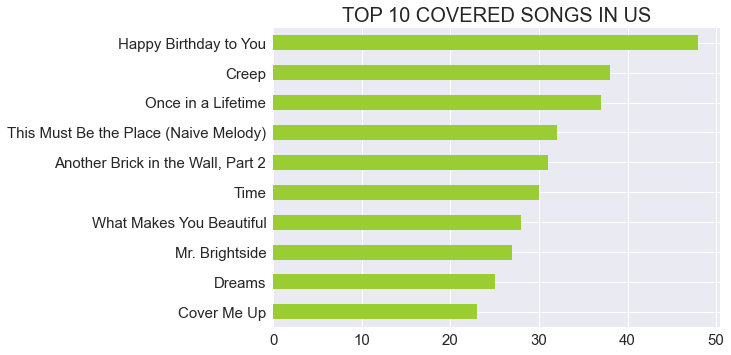

In [446]:
us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='',color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS IN US',fontsize=20)

Text(0.5, 1.0, 'TOP 10 COVERED SONGS OUTSIDE US')

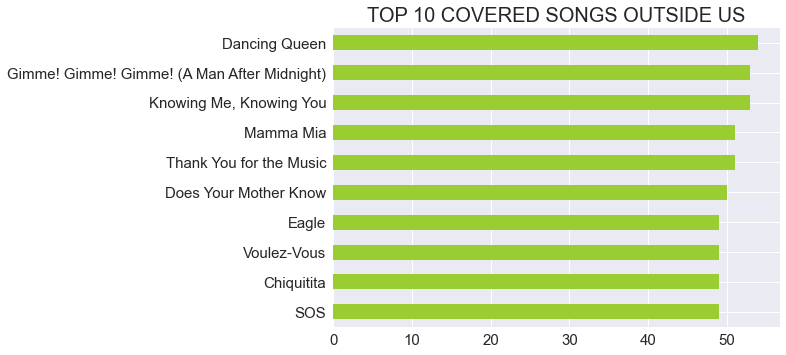

In [443]:
non_us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS OUTSIDE US',fontsize=20)

Text(0.5, 1.0, 'TOP 10 COVERED SONGS')

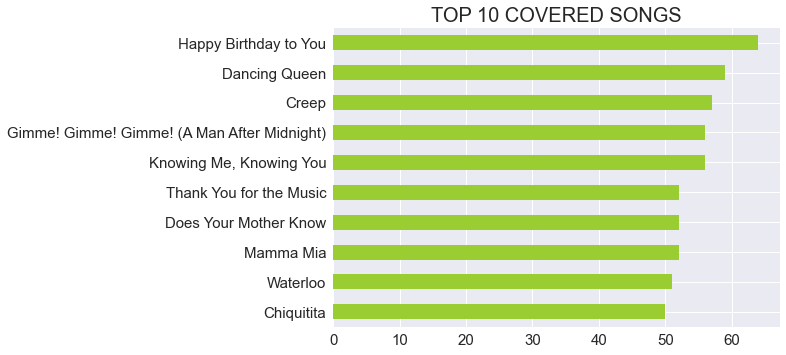

In [441]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='',color='yellowgreen',legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS',fontsize=20)

Text(0.5, 1.0, 'TOP 10 COVERED ARTISTS OUTSIDE US')

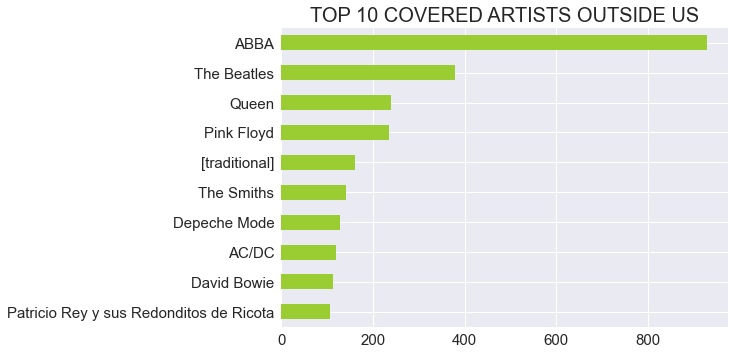

In [438]:
non_us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen',legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED ARTISTS OUTSIDE US',fontsize=20)

Text(0.5, 1.0, 'TOP 10 COVERED ARTISTS IN US')

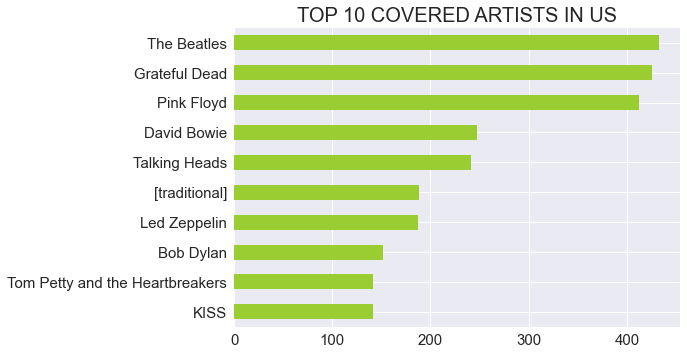

In [439]:
us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED ARTISTS IN US',fontsize=20)

Text(0.5, 1.0, 'TOP 10 COVERED ARTISTS')

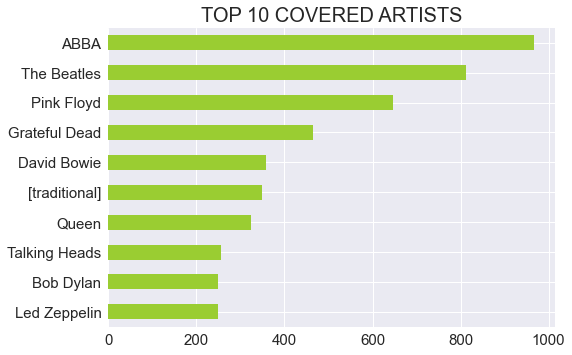

In [445]:
covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', color='yellowgreen',fontsize=15)
plt.title('TOP 10 COVERED ARTISTS',fontsize=20)

In [ ]:
concat['state'].value_counts()

In [ ]:
concat['city'].value_counts()

In [ ]:
concat['city'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='barh')

Text(0.5, 1.0, 'Covers VS Originals')

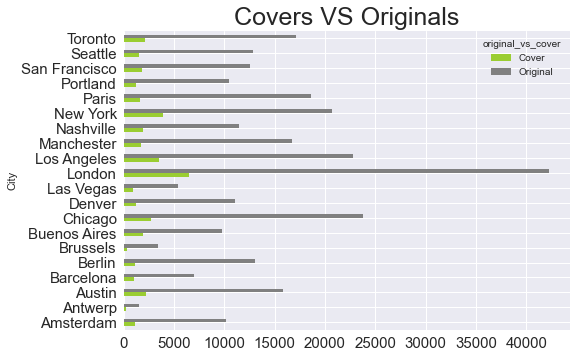

In [409]:
from matplotlib.pyplot import figure
concat.groupby(['city', 'original_vs_cover']).size().unstack('original_vs_cover').plot(kind='barh', color=('yellowgreen', 'grey'),xlabel='City', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)
# plt.tight_layout()
#plt.bar(color='cyan')
# plt.bar(x, B, bottom=A, color='green', label='B')



In [ ]:
pltcolors.get_named_colors_mapping()



In [47]:
top_10_cities = concat.groupby('city').count()
top_10_cities

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
city,,,,,,,,,,,,,,,,
Amsterdam,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11250,11305,11305
Antwerp,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1634,1649,1649
Austin,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,17822,18029,18029
Barcelona,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7926,7958,7958
Berlin,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14076,14191,14191
Brussels,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3732,3739,3739
Buenos Aires,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11564,11660,11660
Chicago,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26348,26527,26527
Denver,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12141,12219,12219


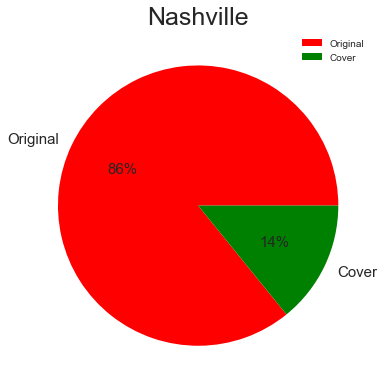

In [101]:
nashville = concat[concat['city']=='Nashville']

nashville['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Nashville',fontsize=25)
plt.tight_layout()

In [ ]:
nashville['artist'].value_counts()

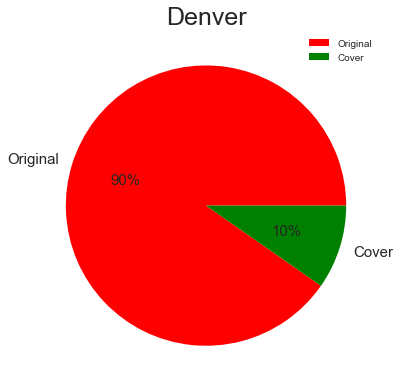

In [118]:
denver = concat[concat['city']=='Denver']

denver['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Denver',fontsize=25)
plt.tight_layout()

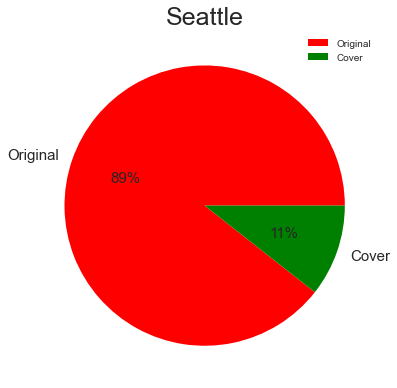

In [119]:
seattle = concat[concat['city']=='Seattle']

seattle['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Seattle',fontsize=25)
plt.tight_layout()

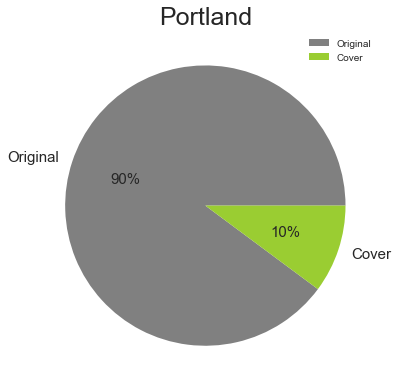

In [408]:
portland = concat[concat['city']=='Portland']

portland['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Portland',fontsize=25)
plt.tight_layout()


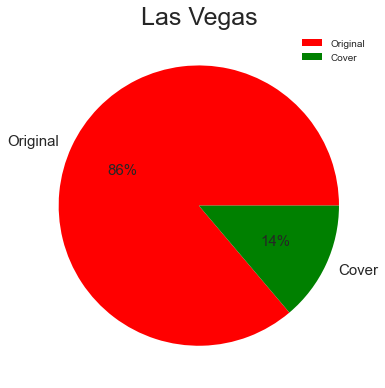

In [121]:
las_vegas = concat[concat['city']=='Las Vegas']

las_vegas['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Las Vegas',fontsize=25)
plt.tight_layout()

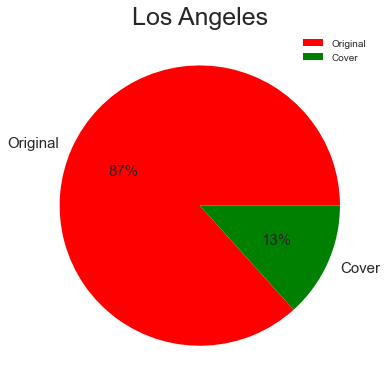

In [122]:
los_angeles = concat[concat['city']=='Los Angeles']

los_angeles['original_vs_cover'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Los Angeles',fontsize=25)
plt.tight_layout()

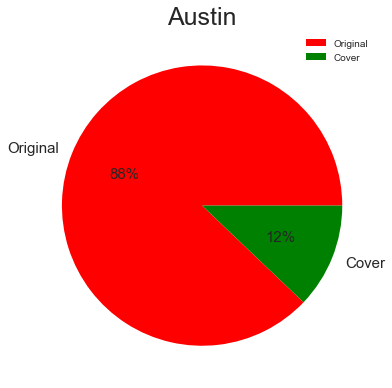

In [123]:
austin = concat[concat['city']=='Austin']

austin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Austin',fontsize=25)
plt.tight_layout()

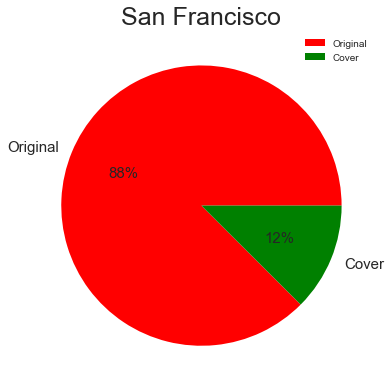

In [124]:
san_francisco = concat[concat['city']=='San Francisco']

san_francisco['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('San Francisco',fontsize=25)
plt.tight_layout()

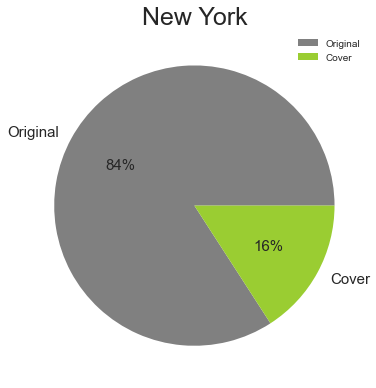

In [434]:
new_york = concat[concat['city']=='New York']

new_york['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('New York',fontsize=25)
plt.tight_layout()



## PIE CHARTS FOR NON US CITIES

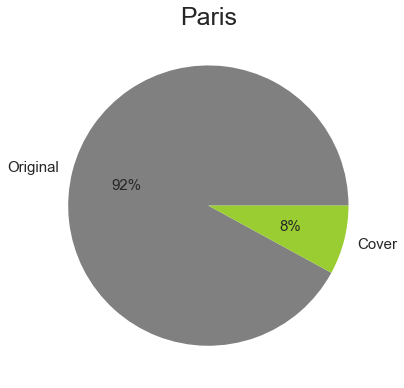

In [432]:
paris = concat[concat['city']=='Paris']
paris['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Paris',fontsize=25)
plt.tight_layout()

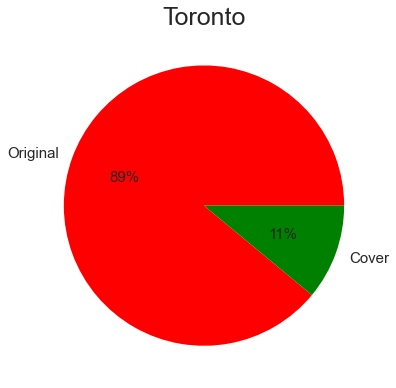

In [109]:
toronto = concat[concat['city']=='Toronto']
toronto['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Toronto',fontsize=25)
plt.tight_layout()

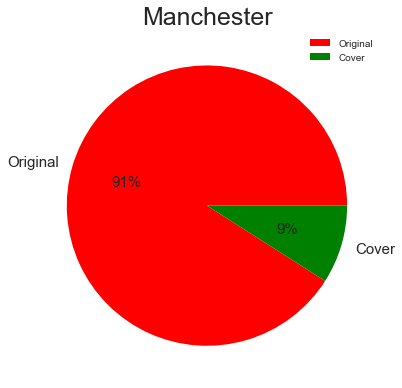

In [110]:
manchester = concat[concat['city']=='Manchester']
manchester['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Manchester',fontsize=25)
plt.tight_layout()

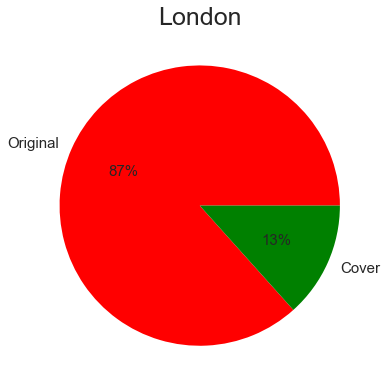

In [111]:
london = concat[concat['city']=='London']
london['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('London',fontsize=25)
plt.tight_layout()

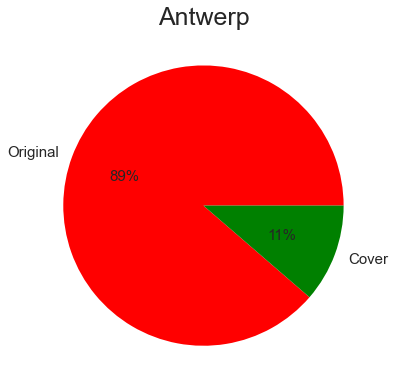

In [112]:
antwerp = concat[concat['city']=='Antwerp']
antwerp['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Antwerp',fontsize=25)
plt.tight_layout()

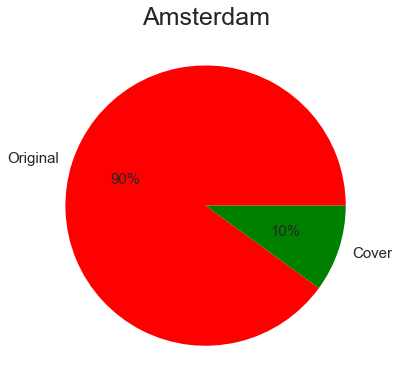

In [117]:
amsterdam = concat[concat['city']=='Amsterdam']
amsterdam['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Amsterdam',fontsize=25)
plt.tight_layout()

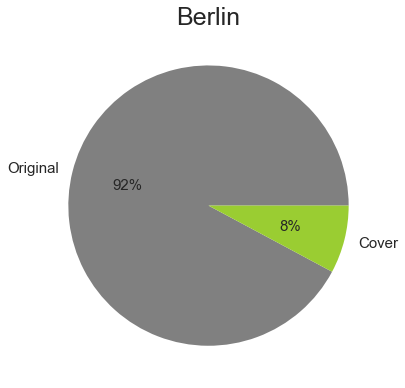

In [431]:
berlin = concat[concat['city']=='Berlin']
berlin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Berlin',fontsize=25)
plt.tight_layout()

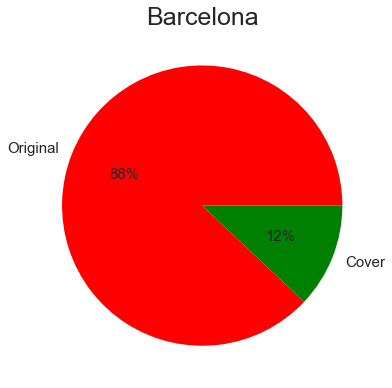

In [114]:
barcelona = concat[concat['city']=='Barcelona']
barcelona['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Barcelona',fontsize=25)
plt.tight_layout()

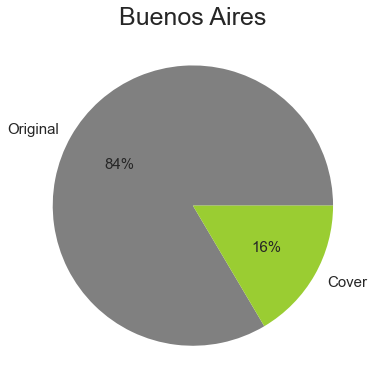

In [433]:
buenos_aires = concat[concat['city']=='Buenos Aires']
buenos_aires['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Buenos Aires',fontsize=25)
plt.tight_layout()

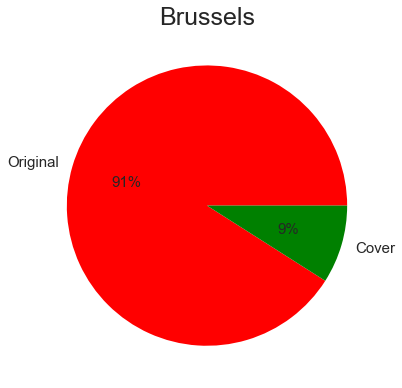

In [115]:
brussels = concat[concat['city']=='Brussels']
brussels['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Brussels',fontsize=25)
plt.tight_layout()

In [ ]:
chart =covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Artists',fontsize=25)
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.savefig("Eligibility_Categories.png")
# plt.show()

In [ ]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Songs',fontsize=25)

In [ ]:
concat.groupby(['original_vs_cover', 'artist'])['song'].count()


In [ ]:
# want to look at what venues have the highest proportion of covers to originals (group by cvo and venue)
# want to look at which artists play the most cover songs (group by cvo and artist)

In [ ]:
concat['artist'].value_counts().nlargest(10).plot(kind='barh')

In [ ]:
harry_styles=concat[concat['artist']=='Harry Styles']
distribution = harry_styles.groupby('original_vs_cover').count()
distribution

In [ ]:

harry_styles_originals = harry_styles[harry_styles['original_vs_cover']=='Original']
# percentage =harry_styles_covers/harry_styles_originals
# percentage

In [ ]:
concat.groupby('original_vs_cover')['state'].value_counts(normalize=True).mul(100)

In [ ]:
nashville.groupby('original_vs_cover')['venue'].value_counts(normalize=True).mul(100)

In [ ]:
concat.groupby('state')['original_vs_cover'].value_counts(normalize=True).mul(100).round()

In [ ]:
concat.groupby('city')['original_vs_cover'].value_counts(normalize=True).mul(100).round().sort_values(ascending=False).plot(kind='barh')



In [ ]:
concat.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='City', legend=True, ylabel='', fontsize=15)


In [48]:
concat_1 = concat[['ids', 'country','original_vs_cover']]

In [49]:
concat_2 =concat_1.groupby(['country', 'original_vs_cover']).count()

In [50]:
concat_3 =concat_2.reset_index()
concat_3

,country,original_vs_cover,ids
0,Argentina,Cover,1923
1,Argentina,Original,9737
2,Belgium,Cover,524
3,Belgium,Original,4864
4,Canada,Cover,2122
5,Canada,Original,17137
6,France,Cover,1612
7,France,Original,18643
8,Germany,Cover,1110
9,Germany,Original,13081


Text(0.5, 1.0, 'Covers VS Originals')

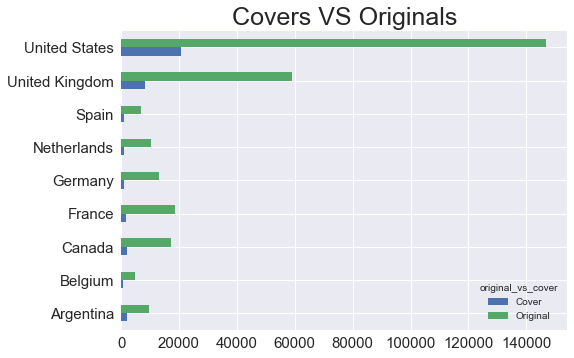

In [54]:
concat.groupby(['country', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)

In [ ]:
plt.barh(concat_3['country'], concat_3['ids'])
plt.show()



Text(0.5, 1.0, 'Covers VS Originals by US Cities')

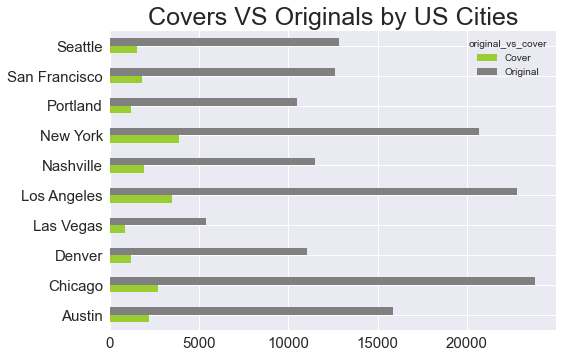

In [425]:
us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', color=['yellowgreen', 'grey'],legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by US Cities',fontsize=25)

Text(0.5, 1.0, 'Covers VS Originals by Country')

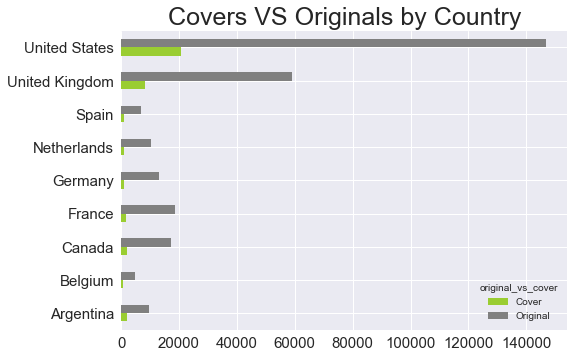

In [426]:
concat.groupby(['country', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', color=['yellowgreen', 'grey'],legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by Country',fontsize=25)

Text(0.5, 1.0, 'Covers VS Originals by Non US Cities')

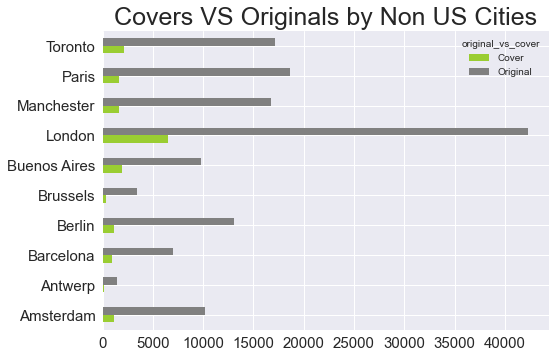

In [427]:
non_us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='',color=['yellowgreen', 'grey'], legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by Non US Cities',fontsize=25)

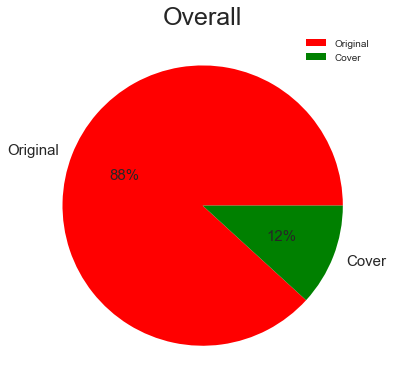

In [71]:
concat['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Overall',fontsize=25)
plt.tight_layout()
                        

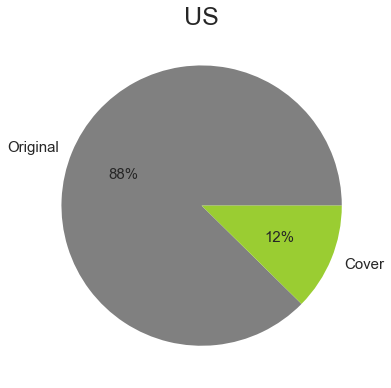

In [485]:
us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=False, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('US',fontsize=25)
plt.tight_layout()
                        

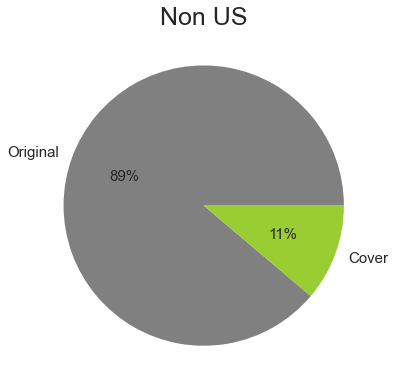

In [484]:
non_us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=False, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Non US',fontsize=25)
plt.tight_layout()
                        

In [87]:
concat['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)


,original_vs_cover
Original,88.0
Cover,12.0


In [104]:
us_df = us['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

In [103]:
non_us_df= non_us['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

In [102]:
nashville['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

,original_vs_cover
Original,86.0
Cover,14.0


In [106]:
both = pd.concat([us_df, non_us_df])
both

,original_vs_cover
Original,88.0
Cover,12.0
Original,89.0
Cover,11.0


In [95]:
concat_3

,country,original_vs_cover,ids
0,Argentina,Cover,1923
1,Argentina,Original,9737
2,Belgium,Cover,524
3,Belgium,Original,4864
4,Canada,Cover,2122
5,Canada,Original,17137
6,France,Cover,1612
7,France,Original,18643
8,Germany,Cover,1110
9,Germany,Original,13081


In [97]:
# concat_3.groupby(['country', 'original_vs_cover']).value_counts(normalize=True).to_frame()


In [127]:
# artists who played the most songs. Also want to look at who played the most shows? group by ids?
concat['artist'].value_counts()

ABBA Voyage               948
Bob Schneider             947
Alien Chicks              632
Harry Styles              620
Kendrick Lamar            618
                         ... 
Omar                        1
Silvina Moreno              1
Yellow Socks Orchestra      1
Molly Pepper                1
Yves Paquet                 1
Name: artist, Length: 10059, dtype: int64

In [129]:
concat['venue'].value_counts()

O2 Academy Brixton                               2797
Ryman Auditorium                                 2791
Private Venue                                    2635
Paradiso Grote Zaal                              2280
The O2 Arena                                     2233
                                                 ... 
Salmon Bay Eagles (Fraternal Order of Eagles)       1
Teatro de la Psychomachia                           1
Phonox                                              1
Fraternal Order of Eagles                           1
Théâtre du Châtelet                                 1
Name: venue, Length: 2335, dtype: int64

In [131]:
concat.groupby('artist')['ids'].count().nlargest(10)

artist
ABBA Voyage        948
Bob Schneider      947
Alien Chicks       632
Harry Styles       620
Kendrick Lamar     618
Robyn Hitchcock    606
Mitski             547
Pavement           526
Alicia Keys        493
Turnstile          488
Name: ids, dtype: int64

In [140]:
concat.groupby(['artist', 'ids']).count().nlargest(10)

TypeError: nlargest() missing 1 required positional argument: 'columns'

In [143]:
concat_id = concat.reset_index()
concat_id.head()

,index,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original


In [193]:
# shows artists with the longest sets


concat_id.groupby(['artist', 'ids'])['index'].count().nlargest(10)

artist            ids     
CLUB 90's         7bb22a58    80
Guided by Voices  53898f31    46
                  23beb8d3    45
Stephen Horne     23b10807    44
Duki              1bb1cdf8    43
Guided by Voices  5b894b7c    43
                  23b6a813    42
                  7b8952c4    42
Lou Barlow        1bbee58c    42
Guided by Voices  4b8957ba    41
Name: index, dtype: int64

In [194]:
# shows venues with the longest sets

concat_id.groupby(['venue', 'ids'])['index'].count().nlargest(10)

venue                      ids     
The Belasco                7bb22a58    80
Irving Plaza               53898f31    46
Mohawk                     23beb8d3    45
Castro Theatre             23b10807    44
Estadio Vélez Sarsfield    1bb1cdf8    43
Great American Music Hall  5b894b7c    43
De Cornelia                1bbee58c    42
Revolution Hall            7b8952c4    42
Teragram Ballroom          23b6a813    42
Band on the Wall           1bb2fd34    41
Name: index, dtype: int64

In [195]:
concat_id.groupby(['venue', 'ids'])['original_vs_cover'].count().nlargest(10)

venue                      ids     
The Belasco                7bb22a58    80
Irving Plaza               53898f31    46
Mohawk                     23beb8d3    45
Castro Theatre             23b10807    44
Estadio Vélez Sarsfield    1bb1cdf8    43
Great American Music Hall  5b894b7c    43
De Cornelia                1bbee58c    42
Revolution Hall            7b8952c4    42
Teragram Ballroom          23b6a813    42
Band on the Wall           1bb2fd34    41
Name: original_vs_cover, dtype: int64

In [149]:
# look at song name popularity (that is not a cover)

originals = concat[concat['original_vs_cover']=='Original']

originals['song'].value_counts().nlargest(25)

Intro          310
Drum Solo      147
Home           142
Paradise       112
Satellite       89
Gravity         88
Forever         82
Sorry           81
Promises        76
Free            76
Wake Up         75
Happy           74
Matilda         74
Guitar Solo     73
Fire            73
Heaven          70
Change          70
Psycho          70
Strangers       70
Teeth           70
Lonely          69
Run             69
Gasoline        69
Control         68
Hurricane       68
Name: song, dtype: int64

In [151]:
originals.groupby('artist')['song'].count().nlargest(25)

artist
Bob Schneider             884
Alien Chicks              632
Harry Styles              567
Kendrick Lamar            563
Mitski                    544
Pavement                  524
Turnstile                 477
Wet Leg                   449
Alicia Keys               427
Circle Jerks              407
Wallows                   405
IDLES                     404
Fontaines D.C.            378
Hanson                    372
Bob Dylan                 366
Pinegrove                 358
Mudhoney                  357
Wolf Alice                357
Die Ärzte                 345
Machine Gun Kelly         344
PUP                       344
Post Malone               342
5 Seconds of Summer       338
Florence + the Machine    338
Osees                     336
Name: song, dtype: int64

In [153]:
# artist with the most shows overall (arist by ids)

concat.groupby('artist')['ids'].count().nlargest(10)

artist
ABBA Voyage        948
Bob Schneider      947
Alien Chicks       632
Harry Styles       620
Kendrick Lamar     618
Robyn Hitchcock    606
Mitski             547
Pavement           526
Alicia Keys        493
Turnstile          488
Name: ids, dtype: int64

In [164]:
concat['ids'].value_counts()

7bb22a58    80
53898f31    46
23beb8d3    45
23b10807    44
5b894b7c    43
            ..
4bb343a2     1
63bf92bf     1
4bbf9b4e     1
bbe5de6      1
1b887580     1
Name: ids, Length: 29035, dtype: int64

In [167]:
# second longest set:

second_longest_set = concat[concat['ids']=='53898f31']
second_longest_set.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
22165,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Everybody Thinks I'm a Raincloud (When I'm Not...,original,Original
22166,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Re-Develop,original,Original
22167,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Spanish Coin,original,Original
22168,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,A Salty Salute,original,Original
22169,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Haircut Sphinx,original,Original


In [169]:
second_longest_set['song'].value_counts()

# no repeated songs

Everybody Thinks I'm a Raincloud (When I'm Not Looking)    1
Mad River Man                                              1
The Batman Sees the Ball                                   1
Stops                                                      1
To Keep an Area                                            1
Never Abandon Ship                                         1
The Very Second                                            1
Yours to Keep                                              1
Echos Myron                                                1
Free Agents                                                1
The Rally Boys                                             1
My Kind of Soldier                                         1
Re-Develop                                                 1
The Best of Jill Hives                                     1
People Need Holes                                          1
Twilight Campfighter                                       1
Crystal Nuns Cathedral  

In [170]:
# Guided by Voices played 46 songs and 2 of them were covers

second_longest_set['original_vs_cover'].value_counts()

Original    44
Cover        2
Name: original_vs_cover, dtype: int64

In [ ]:
# want to look at most popular song names but grouped by show (ids) or artist

<AxesSubplot:>

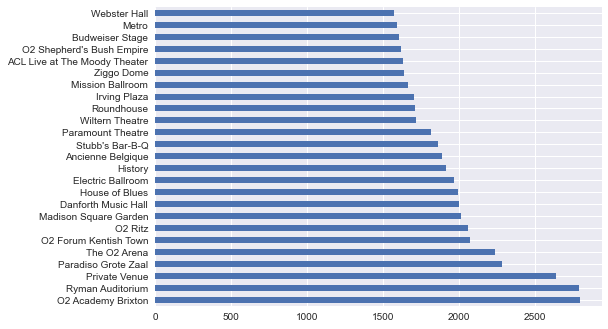

In [177]:
# venues with the most songs played 
concat['venue'].value_counts().nlargest(25).plot(kind='barh')

In [183]:
# shows the amount of songs per show

shows = concat.groupby('ids').count()
shows.head()

,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
ids,,,,,,,,,,,,,,,,
3897507,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
7389960,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
13881559,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
13881579,7,7,7,7,7,7,7,7,7,7,7,7,7,6,7,7
13883975,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [191]:
# cover bands?


AttributeError: 'DataFrame' object has no attribute 'avg'

In [196]:
# look at which venues have the most cover songs played their venues
# group by ids (show). Then calculate proportion of original to cover. Create seperate column to classify set as more original or more covers. create this measurre based on average amount of covers per set. 
# Find average cover songs/set. 

# for each set, need count of originals and count of covers. group by ids and adding up original and covers. 
# datacamp lesson: two columns (set id, original vs cover column) make a simple dictionary and turn it into a dataframe 

# if a band has specific percentage of covers, then call them a cover band

concat.groupby('ids').count()

# concat.groupby('ids')['covers'].sum()

,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
ids,,,,,,,,,,,,,,,,
3897507,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
7389960,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
13881559,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
13881579,7,7,7,7,7,7,7,7,7,7,7,7,7,6,7,7
13883975,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbfed62,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
bbfedb2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
bbff182,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [198]:
test = concat[['ids','original_vs_cover']]
test.head()

,ids,original_vs_cover
0,63bc928f,Original
1,63bc928f,Original
2,53bcb7fd,Original
3,53bcb7fd,Original
4,53bcb7fd,Original


In [206]:
# concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')

test['original']= np.where(test['original_vs_cover']=='Original', 1, 0)
test.head()

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_30940\2533770937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['original']= np.where(test['original_vs_cover']=='Original', 1, 0)


,ids,original_vs_cover,original,cover
0,63bc928f,Original,1,0
1,63bc928f,Original,1,0
2,53bcb7fd,Original,1,0
3,53bcb7fd,Original,1,0
4,53bcb7fd,Original,1,0


In [205]:
test['cover']=np.where(test['original_vs_cover']=='Cover', 1, 0)
test.head()

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_30940\4204946207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cover']=np.where(test['original_vs_cover']=='Cover', 1, 0)


,ids,original_vs_cover,original,cover
0,63bc928f,Original,1,0
1,63bc928f,Original,1,0
2,53bcb7fd,Original,1,0
3,53bcb7fd,Original,1,0
4,53bcb7fd,Original,1,0


In [214]:

grouped_setlists =test.groupby('ids')[('cover', 'original')].sum()

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_30940\689069277.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_setlists =test.groupby('ids')[('cover', 'original')].sum()


In [218]:
grouped_setlists['total songs']=grouped_setlists['cover']+grouped_setlists['original']
grouped_setlists.head()

,cover,original,total songs
ids,,,
3897507,0,13,13
7389960,0,12,12
13881559,0,5,5
13881579,0,7,7
13883975,0,5,5


In [233]:
grouped_setlists['perc_cover']=grouped_setlists['cover']/grouped_setlists['total songs']
grouped_setlists.head()

,cover,original,total songs,perc_cover
ids,,,,
3897507,0,13,13,0.0
7389960,0,12,12,0.0
13881559,0,5,5,0.0
13881579,0,7,7,0.0
13883975,0,5,5,0.0


In [300]:
grouped_setlists.describe()

,cover,original,total songs,perc_cover
count,29035.000000,29035.000000,29035.000000,29035.000000
mean,1.319408,9.868228,11.187636,0.125595
std,3.139738,6.043087,6.125976,0.255813
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,6.000000,7.000000,0.000000
50%,0.000000,10.000000,11.000000,0.000000
75%,1.000000,14.000000,15.000000,0.111111
max,38.000000,78.000000,80.000000,1.000000


In [244]:
coverbands = grouped_setlists[grouped_setlists['perc_cover']==1]
coverbands

,cover,original,total songs,perc_cover
ids,,,,
3.388e+28,21,0,21,1.0
138839c1,8,0,8,1.0
138845f1,11,0,11,1.0
1388c505,10,0,10,1.0
1388e535,1,0,1,1.0
...,...,...,...,...
bbef5ce,12,0,12,1.0
bbefd1a,10,0,10,1.0
bbefd1e,12,0,12,1.0


In [339]:
original_bands = grouped_setlists[grouped_setlists['perc_cover']<1]
original_bands.head()

,cover,original,total songs,perc_cover
ids,,,,
3897507,0,13,13,0.0
7389960,0,12,12,0.0
13881559,0,5,5,0.0
13881579,0,7,7,0.0
13883975,0,5,5,0.0


In [ ]:
original_bands = orginal_bands[original_bands['']]

In [265]:
coverbands.describe()

,cover,original,total songs,perc_cover
count,1398.000000,1398.0,1398.000000,1398.0
mean,7.280401,0.0,7.280401,1.0
std,7.067427,0.0,7.067427,0.0
min,1.000000,0.0,1.000000,1.0
25%,1.000000,0.0,1.000000,1.0
50%,4.500000,0.0,4.500000,1.0
75%,12.000000,0.0,12.000000,1.0
max,38.000000,0.0,38.000000,1.0


In [340]:
coverbands_all_setlist_lengths = grouped_setlists[grouped_setlists['perc_cover']==1]

In [341]:
coverbands_less_than_7_songs = coverbands_all_setlist_lengths[coverbands_all_setlist_lengths['cover']<=7]

In [ ]:
all_other = pd.concat[coverbands_all_setlist_lengths, original_bands]

In [321]:
# coverbands means 100% setlist is cover songs and setlist is at least 8 songs

coverbands = coverbands[coverbands['cover']>7]
coverbands

,cover,original,total songs,perc_cover
ids,,,,
3.388e+28,21,0,21,1.0
138839c1,8,0,8,1.0
138845f1,11,0,11,1.0
1388c505,10,0,10,1.0
1388fd75,9,0,9,1.0
...,...,...,...,...
bbed5ca,8,0,8,1.0
bbef5ce,12,0,12,1.0
bbefd1a,10,0,10,1.0


In [322]:
coverbands_setlists=coverbands.reset_index()

In [323]:
coverband_setlist_id_list = coverbands_setlists['ids'].tolist()
len(coverband_setlist_id_list)
# nashville_venue_id_list = nashville_venues_df['venue_id'].tolist()


579

In [324]:
# df[df[df.columns[1]].isin(list)]

list = coverband_setlist_id_list




coverband_df = concat[concat[concat.columns[0]].isin(list)]

# new = data["Gender"].isin(["Male"])

In [325]:
coverband_df.head(50)

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
617,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Working for the Weekend,Loverboy,Cover
618,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Walking on Sunshine,Katrina and the Waves,Cover
619,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,You Can Call Me Al,Paul Simon,Cover
620,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,(I've Had) The Time of My Life,Bill Medley & Jennifer Warnes,Cover
621,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Only in My Dreams,Debbie Gibson,Cover
622,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,What About Love,Toronto,Cover
623,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Rebel Yell,Billy Idol,Cover
624,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Mickey,Toni Basil,Cover
625,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Happy Birthday to You,Mildred J. Hill & Patty Hill,Cover
626,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Smooth Criminal,Michael Jackson,Cover


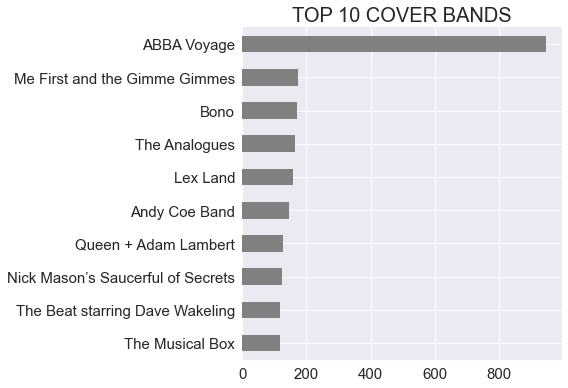

In [464]:
coverband_df['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='grey',fontsize=15)

plt.title('TOP 10 COVER BANDS',fontsize=20)
plt.tight_layout()

In [381]:
coverband_df.to_excel('music_matters_coverbands.xlsx', sheet_name='coverbands', index=False)

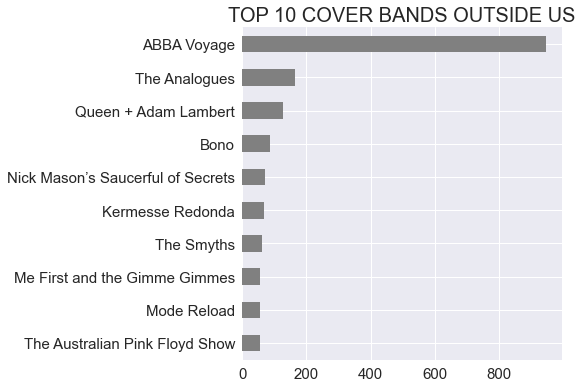

In [463]:
non_us_coverbands['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='grey',fontsize=15)

plt.title('TOP 10 COVER BANDS OUTSIDE US',fontsize=20)
plt.tight_layout()

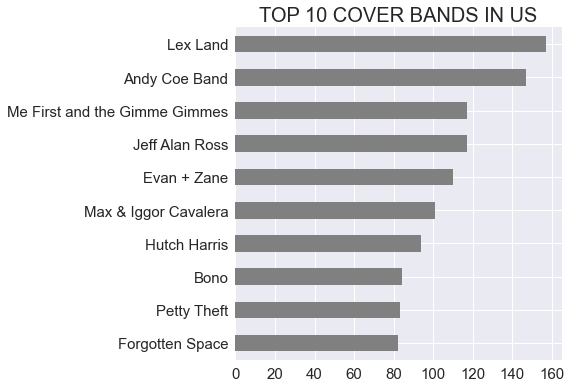

In [462]:
us_coverbands['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15,color='grey')

plt.title('TOP 10 COVER BANDS IN US',fontsize=20)
plt.tight_layout()

In [329]:
coverband_df['venue'].value_counts().nlargest(10)

ABBA Arena                                  947
Private Venue                               284
Ziggo Dome                                  161
Palladium Times Square                      157
Beacon Theatre                              123
Clive Davis Theater at the Grammy Museum    117
Paramount Theatre                           110
El Teatro Flores                            110
Blue Moon Tavern                            109
London Palladium                             99
Name: venue, dtype: int64

In [330]:
non_us_coverbands['venue'].value_counts().nlargest(10)

ABBA Arena              947
Ziggo Dome              161
El Teatro Flores        110
London Palladium         99
The O2 Arena             90
Danforth Music Hall      88
O2 Academy Islington     84
O2 Apollo Manchester     67
Electric Ballroom        63
El Mocambo               58
Name: venue, dtype: int64

In [331]:
us_coverbands['venue'].value_counts().nlargest(10)

Private Venue                               261
Palladium Times Square                      157
Beacon Theatre                              123
Clive Davis Theater at the Grammy Museum    117
Paramount Theatre                           110
Blue Moon Tavern                            109
So Many Roads Museum and Brewery             96
Sony Hall                                    96
Hutch Harris' Home                           94
The Bourbon Room Hollywood                   87
Name: venue, dtype: int64

In [333]:
coverband_df['city'].value_counts()

London           2031
Los Angeles       820
New York          818
Buenos Aires      484
San Francisco     455
Chicago           447
Toronto           404
Portland          358
Seattle           309
Austin            266
Berlin            259
Paris             257
Denver            254
Manchester        245
Amsterdam         229
Nashville         206
Barcelona         168
Las Vegas         139
Brussels          116
Antwerp            44
Name: city, dtype: int64

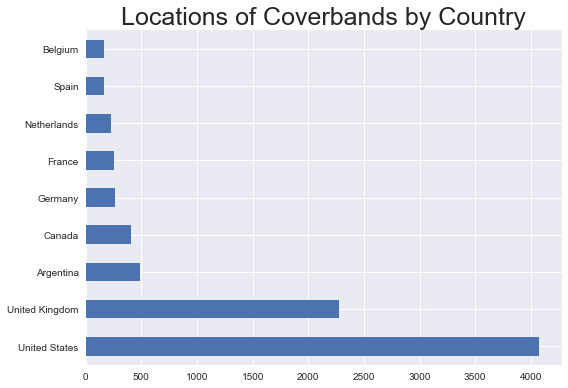

In [334]:
coverband_df['country'].value_counts().plot(kind='barh')

plt.title('Locations of Coverbands by Country',fontsize=25)
plt.tight_layout()

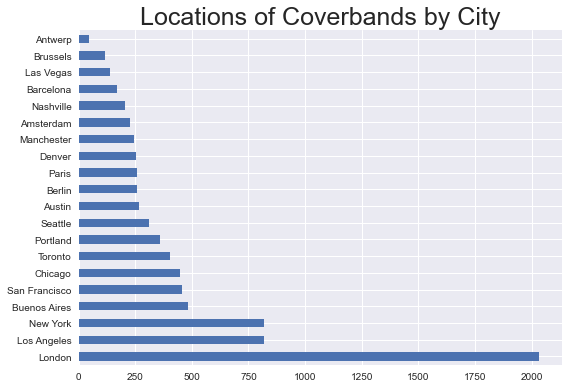

In [335]:
coverband_df['city'].value_counts().plot(kind='barh')

plt.title('Locations of Coverbands by City',fontsize=25)
plt.tight_layout()

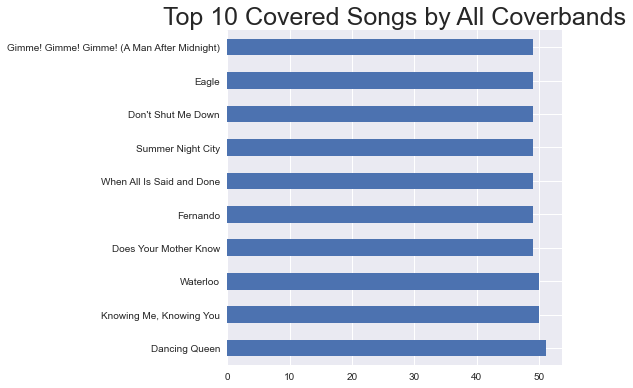

In [336]:
coverband_df['song'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Songs by All Coverbands',fontsize=25)
plt.tight_layout()

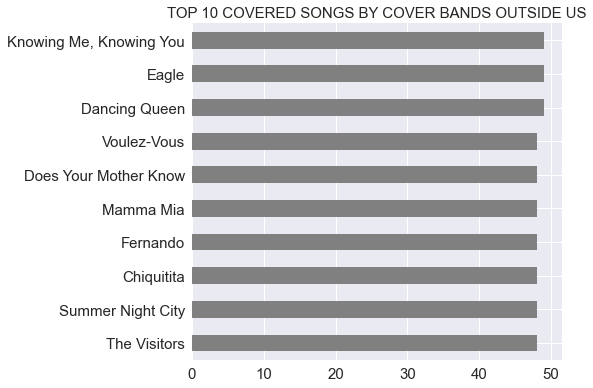

In [471]:
non_us_coverbands['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')
plt.title('TOP 10 COVERED SONGS BY COVER BANDS OUTSIDE US',fontsize=15)
plt.tight_layout()

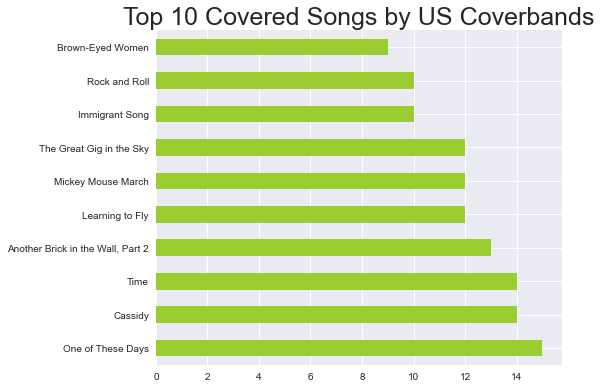

In [430]:
us_coverbands['song'].value_counts().nlargest(10).plot(kind='barh', color='yellowgreen')

plt.title('Top 10 Covered Songs by US Coverbands',fontsize=25)
plt.tight_layout()

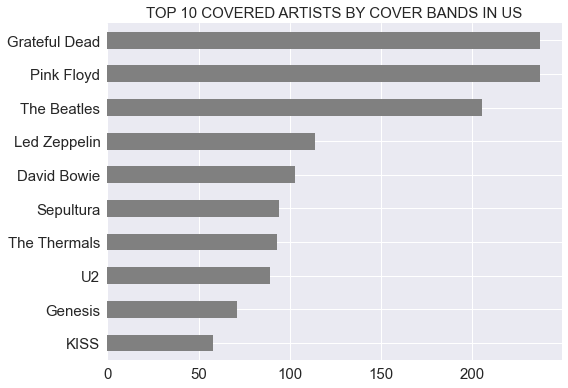

In [480]:
us_coverbands['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')


plt.title('TOP 10 COVERED ARTISTS BY COVER BANDS IN US',fontsize=15)
plt.tight_layout()

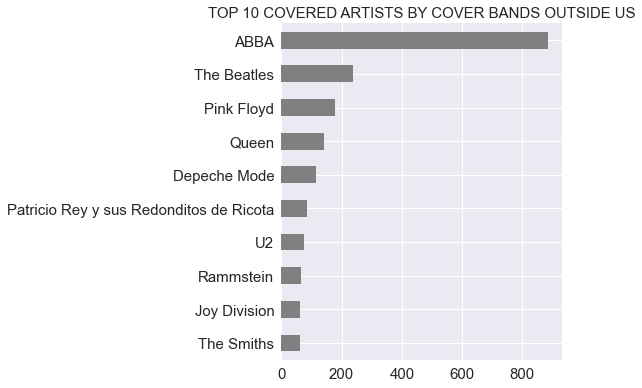

In [481]:
non_us_coverbands['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')


plt.title('TOP 10 COVERED ARTISTS BY COVER BANDS OUTSIDE US',fontsize=15)
plt.tight_layout()

In [ ]:
coverband_df['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')


plt.title('TOP 10 COVERED ARTISTS BY COVER BANDS OUTSIDE US',fontsize=15)

In [285]:
non_us_coverbands= coverband_df[coverband_df['country']!='United States']
non_us_coverbands.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
167652,bbc85da,g13e3b555,14-12-2022,2022-12-14T21:00:14.976+0000,Duo Játékok,Le Bal Blomet,7bd376bc,Paris,Île-de-France,France,11,FR,48.853,2.349,Ellis Island,Meredith Monk,Cover
167653,bbc85da,g13e3b555,14-12-2022,2022-12-14T21:00:14.976+0000,Duo Játékok,Le Bal Blomet,7bd376bc,Paris,Île-de-France,France,11,FR,48.853,2.349,Engel,Rammstein,Cover
167654,bbc85da,g13e3b555,14-12-2022,2022-12-14T21:00:14.976+0000,Duo Játékok,Le Bal Blomet,7bd376bc,Paris,Île-de-France,France,11,FR,48.853,2.349,Cantate Actus Tragicus,Johann Sebastian Bach,Cover
167655,bbc85da,g13e3b555,14-12-2022,2022-12-14T21:00:14.976+0000,Duo Játékok,Le Bal Blomet,7bd376bc,Paris,Île-de-France,France,11,FR,48.853,2.349,Mein Herz brennt,Rammstein,Cover
167656,bbc85da,g13e3b555,14-12-2022,2022-12-14T21:00:14.976+0000,Duo Játékok,Le Bal Blomet,7bd376bc,Paris,Île-de-France,France,11,FR,48.853,2.349,Diamant,Rammstein,Cover


In [284]:
us_coverbands= coverband_df[coverband_df['country']=='United States']
us_coverbands.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
617,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Working for the Weekend,Loverboy,Cover
618,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Walking on Sunshine,Katrina and the Waves,Cover
619,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,You Can Call Me Al,Paul Simon,Cover
620,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,(I've Had) The Time of My Life,Bill Medley & Jennifer Warnes,Cover
621,73bf0e6d,g6be2fa1a,03-12-2022,2022-12-05T22:31:15.206+0000,Rubix Kube,The Cutting Room,6bd63656,New York,New York,United States,NY,US,40.714269,-74.005973,Only in My Dreams,Debbie Gibson,Cover


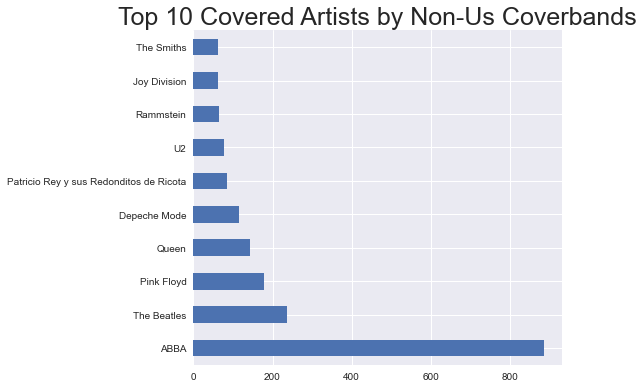

In [289]:
non_us_coverbands['cover'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Artists by Non-Us Coverbands',fontsize=25)
plt.tight_layout()

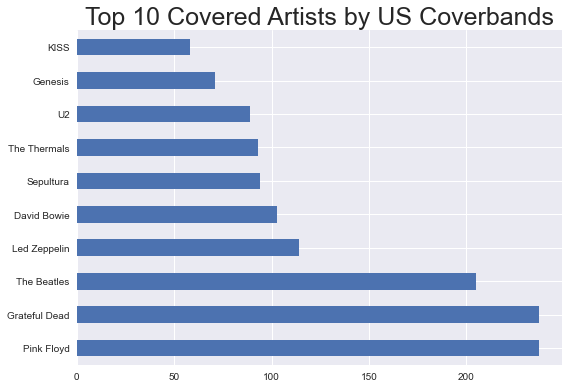

In [290]:
us_coverbands['cover'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Artists by US Coverbands',fontsize=25)
plt.tight_layout()

In [ ]:
us_coverbands['cover'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Artists by US Coverbands',fontsize=25)
plt.tight_layout()

In [272]:
len(coverband_df)

8309

In [258]:
# need to eliminate sets that are only 1 song so we don't include bands like punch brothers who played one song and it happended to be traditional

punch_brothers = concat[concat['ids']=='6bbf6a6e']
punch_brothers

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
427,6bbf6a6e,g1be2c11c,06-12-2022,2022-12-08T16:15:17.044+0000,Punch Brothers,"Wu Tsai Theater at David Geffen Hall, Lincoln ...",6bd05a72,New York,New York,United States,NY,US,40.714269,-74.005973,Little Birdie,[traditional],Cover


In [173]:
artists_by_show =concat.groupby(['artist','ids']).count()
artists_by_show

versionid  eventdate  \
artist                                     ids                              
!!!                                        13b48145          4          4   
                                           33b16c11         12         12   
                                           43b72f47         11         11   
                                           53b203f5          6          6   
!Bang Elektronika                          73b2fa75          7          7   
...                                                        ...        ...   
…And You Will Know Us by the Trail of Dead 3b3810f          12         12   
                                           43892f23          8          8   
                                           43b1173b         16         16   
                                           4bb19fea         11         11   
                                           5bb19fe8         14         14   

                                                     lastupdated  venue  \
artist                                     ids                            
!!!                                        13b48145            4      4   
                                           33b16c11           12     12   
                                           43b72f47           11     11   
                                           53b203f5            6      6   
!Bang Elektronika                          73b2fa75            7      7   
...                                                          ...    ...   
…And You Will Know Us by the Trail of Dead 3b3810f            12     12   
                                           43892f23            8      8   
                                           43b1173b           16     16   
                                           4bb19fea           11     11   
                                           5bb19fe8           14     14   

                                                     venue_id  city  state  \
artist                                     ids                               
!!!                                        13b48145         4     4      4   
                                           33b16c11        12    12     12   
                                           43b72f47        11    11     11   
                                           53b203f5         6     6      6   
!Bang Elektronika                          73b2fa75         7     7      7   
...                                                       ...   ...    ...   
…And You Will Know Us by the Trail of Dead 3b3810f         12    12     12   
                                           43892f23         8     8      8   
                                           43b1173b        16    16     16   
                                           4bb19fea        11    11     11   
                                           5bb19fe8        14    14     14   

                                                     country  stateCode  \
artist                                     ids                            
!!!                                        13b48145        4          4   
                                           33b16c11       12         12   
                                           43b72f47       11         11   
                                           53b203f5        6          6   
!Bang Elektronika                          73b2fa75        7          7   
...                                                      ...        ...   
…And You Will Know Us by the Trail of Dead 3b3810f        12         12   
                                           43892f23        8          8   
                                           43b1173b       16         16   
                                           4bb19fea       11         11   
                                           5bb19fe8       14         14   

                                                     countryCode  lat_coords  \
arti

8     1902
7     1887
1     1761
10    1756
12    1722
11    1678
15    1665
14    1657
9     1608
13    1601
16    1404
6     1337
17    1234
18    1019
2      996
5      985
3      830
4      828
19     737
20     620
21     483
22     308
23     256
24     165
25     118
26      72
27      68
28      66
30      53
29      38
31      36
0       36
32      26
33      21
34      17
35      14
36       9
37       5
42       4
41       2
40       2
39       2
38       2
80       1
45       1
46       1
43       1
44       1
Name: song, dtype: int64

In [155]:

concat_id.groupby('artist')['index'].count().nlargest(10)

artist
ABBA Voyage        948
Bob Schneider      947
Alien Chicks       632
Harry Styles       620
Kendrick Lamar     618
Robyn Hitchcock    606
Mitski             547
Pavement           526
Alicia Keys        493
Turnstile          488
Name: index, dtype: int64

In [132]:
concat.head(10)

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original
5,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Loud Love,Soundgarden,Cover
6,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Make Me Wanna Die,original,Original
7,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Turning Gold,original,Original
8,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Sweet Things,original,Original
9,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Witches Burn,original,Original


In [133]:
concat['ids'].value_counts()

7bb22a58    80
53898f31    46
23beb8d3    45
23b10807    44
5b894b7c    43
            ..
4bb343a2     1
63bf92bf     1
4bbf9b4e     1
bbe5de6      1
1b887580     1
Name: ids, Length: 29035, dtype: int64

In [135]:
longest_set = concat[concat['ids']=='7bb22a58']
longest_set

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
77346,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Moments,original,Original
77347,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Change My Mind,original,Original
77348,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Once in a Lifetime,original,Original
77349,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Don't Forget Where You Belong,original,Original
77350,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Walking in the Wind,original,Original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77421,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Happily,original,Original
77422,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,They Don't Know About Us,original,Original
77423,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,History,original,Original
77424,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,What Makes You Beautiful,original,Original


In [136]:
longest_set.tail(50)

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
77376,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Fireproof,original,Original
77377,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Slow Hands,original,Original
77378,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Miss You,original,Original
77379,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Music for a Sushi Restaurant,original,Original
77380,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Through the Dark,original,Original
77381,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Over Again,original,Original
77382,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Act My Age,original,Original
77383,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Wolves,original,Original
77384,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Little Black Dress,original,Original
77385,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,You & I,original,Original


In [138]:
longest_set['original_vs_cover'].value_counts()

Original    78
Cover        2
Name: original_vs_cover, dtype: int64

In [126]:
non_us.groupby(['artist', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by Non US Cities',fontsize=25)

Text(0.5, 1.0, 'Covers VS Originals by Non US Cities')

C:\Users\Rebecca Wolfe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Joey Bada$$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 576x396 with 1 Axes>

In [348]:
concat_index.to_excel('music_matters_main_dataframe.xlsx', sheet_name='main_dataframe', index=False)

In [344]:
concat.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original


In [351]:
canada=concat_index[concat_index['country']=='Canada']
canada['ids'].shape

(19259,)

In [352]:
len(canada)

19259

In [356]:
concat_index.shape

(324833, 18)

In [357]:
concat.shape

(324833, 17)

In [358]:
concat_index['ids'].value_counts(dropna=False)

7bb22a58    80
53898f31    46
23beb8d3    45
23b10807    44
5b894b7c    43
            ..
4bb343a2     1
63bf92bf     1
4bbf9b4e     1
bbe5de6      1
1b887580     1
Name: ids, Length: 29035, dtype: int64

In [361]:
324833/29035


11.187635612192182

In [360]:
concat_index.nunique()

index                324833
ids                   29035
versionid             29035
eventdate               483
lastupdated           29034
artist                10059
venue                  2335
venue_id               2383
city                     20
state                    18
country                   9
stateCode                17
countryCode               9
lat_coords               21
long_coords              21
song                 103364
cover                  5997
original_vs_cover         2
dtype: int64

In [354]:
canada.nunique()

# 1705 unique setlist ids

index                19259
ids                   1705
versionid             1705
eventdate              288
lastupdated           1705
artist                1433
venue                  115
venue_id               115
city                     1
state                    1
country                  1
stateCode                1
countryCode              1
lat_coords               1
long_coords              1
song                 15619
cover                 1092
original_vs_cover        2
dtype: int64

In [347]:
concat_index=concat.reset_index()
concat_index.head()

,index,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original


In [364]:
concat_index['song'].value_counts().nlargest(10)

Intro        312
Home         153
Drum Solo    147
Paradise     117
Stay          98
Gravity       96
Heaven        90
Time          90
Forever       89
Satellite     89
Name: song, dtype: int64

In [365]:
covers['song'].value_counts().nlargest(10)

Happy Birthday to You                          64
Dancing Queen                                  59
Creep                                          57
Knowing Me, Knowing You                        56
Gimme! Gimme! Gimme! (A Man After Midnight)    56
Mamma Mia                                      52
Does Your Mother Know                          52
Thank You for the Music                        52
Waterloo                                       51
Chiquitita                                     50
Name: song, dtype: int64

In [379]:
coverbands

,cover,original,total songs,perc_cover
ids,,,,
3.388e+28,21,0,21,1.0
138839c1,8,0,8,1.0
138845f1,11,0,11,1.0
1388c505,10,0,10,1.0
1388fd75,9,0,9,1.0
...,...,...,...,...
bbed5ca,8,0,8,1.0
bbef5ce,12,0,12,1.0
bbefd1a,10,0,10,1.0
